O nosso conjunto de dados é descrito da seguinte forma:

|Atributo                                           |   Descrição   |
|---------------------------------------------------|:-------------:|
| Trip Duration                                     |   Duração da viagem em segundos |
| Start Time                                        |   Início da viagem |
| Stop Time                                         |   Fim da Viagem   |
| Start Station ID                                  |   Identificado da estação origem   |
| Start Station Name                                |   Nome da estação onde a viagem iniciou|
| Start Station Latitude / Start Station Longitude  |   Localização onde a viagem iniciou|
| End station id                                    |   Identificado da estação destino   |
| End Station Name                                  |   Nome da estação onde a viagem terminou|
| End Station Latitude / End Station Longitude      |   Localização onde a viagem terminou   |
| Bike ID                                           |   Identificado da bicicleta  |
| User Type                                         |   Customer = passe de 24 horas ou 3 dias; Subscriber = Membro Anual |
| Birth Year                                        |   Ano de nascimento|
| Gender                                            |   0 = desconhecido; 1 = masculino; 2 = feminino |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)   # Mostra todas as colunas do dataset


In [2]:
df = pd.read_parquet('/content/drive/MyDrive/Projeto UFRJ-Analytica/clear dados')   #carregando dados na variavel df

In [3]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


In [4]:
df.shape

(4000000, 15)

### Renomeando Colunas


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
# Renomeando colunas
df = df.rename(columns={'start station id':'start_station_id',
                   'start station name':'start_station_name',
                   'start station latitude':'start_station_latitude',
                   'start station longitude': 'start_station_longitude',
                   'end station id':'end_station_id',
                   'end station name':'end_station_name',
                   'end station latitude':'end_station_latitude',
                   'end station longitude':'end_station_longitude',
                   'birth year': 'birth_year'})

In [7]:
df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


### Podemos verificar que na coluna 'birth_year' existem alguns valores negativos o que não faz muito sentido. Devemos ter valores positivos.

In [8]:
df['birth_year']

0         -1992.0
1         -1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1962.0
3999996    1960.0
3999997    1967.0
3999998    1985.0
3999999    1989.0
Name: birth_year, Length: 4000000, dtype: float64

In [9]:
df ['birth_year'] = df['birth_year'].abs()    # Tomando o modulo dos valores de birth_year
df['birth_year']

0          1992.0
1          1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1962.0
3999996    1960.0
3999997    1967.0
3999998    1985.0
3999999    1989.0
Name: birth_year, Length: 4000000, dtype: float64

### Verificando datas;

*   convertendo o tempo de duração da viagem para minutos
*   criando nova coluna com idades
*   criando nova coluna com dias da semana





In [10]:
# Passando valores das datas de float para tipo datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Alterando coluna de duração de viagem para minutos
df['tripduration'] = df['tripduration']/60.
df = df.rename(columns={'tripduration':'tripduration_min'})

In [11]:
df['age'] = df['starttime'].dt.year - df['birth_year']  # Cria coluna age: pega o ano em que a pessoa usou a bike e subtrai do ano de nascimento

In [12]:
df['weekday'] = df['starttime'].dt.day_name()   # Cria uma coluna weekday

In [13]:
df.head()

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,weekday
0,4.716667,2016-03-31 09:15:31,2016-03-31 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,1992.0,1.0,24.0,Thursday
1,6.533333,2016-09-05 16:43:30,2016-09-05 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,1991.0,2.0,25.0,Monday
2,11.750000,2016-04-17 13:16:39,2016-04-17 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0,37.0,Sunday
3,8.916667,2016-05-02 17:59:46,2016-05-02 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0,32.0,Monday
4,4.766667,2016-02-06 18:27:29,2016-02-06 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0,35.0,Saturday


## Distribuição do Uso de Bicicletas ao Longo da Semana

In [14]:
import seaborn as sns
uso_semanal = df.groupby('weekday').size()    # Agrupa os dados nos dias da semana e nos da a frequencia de ocorrencia por dia
uso_semanal = uso_semanal.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])   # organiza os dados

uso_semanal

weekday
Monday       569218
Tuesday      610636
Wednesday    636415
Thursday     619122
Friday       595336
Saturday     507734
Sunday       461539
dtype: int64

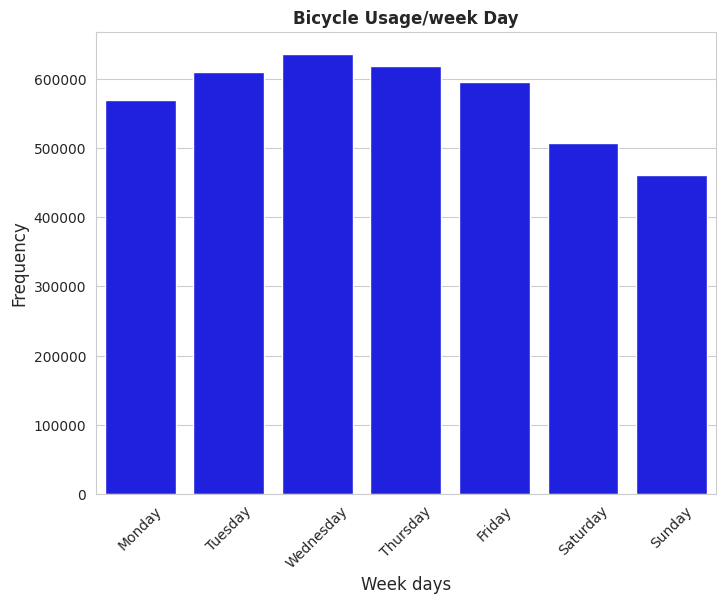

In [15]:
# Criando o gráfico de barras e verificando dia com maior frequencia

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=uso_semanal.index, y=uso_semanal.values, color='blue')
plt.xlabel('Week days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Bicycle Usage/week Day', weight='bold')
plt.xticks(rotation=45)
plt.show()

## Rotas mais Populares (Origem - Destino) e seus Destaques:

In [16]:
df.head(6)

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,weekday
0,4.716667,2016-03-31 09:15:31,2016-03-31 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,1992.0,1.0,24.0,Thursday
1,6.533333,2016-09-05 16:43:30,2016-09-05 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,1991.0,2.0,25.0,Monday
2,11.750000,2016-04-17 13:16:39,2016-04-17 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0,37.0,Sunday
3,8.916667,2016-05-02 17:59:46,2016-05-02 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0,32.0,Monday
4,4.766667,2016-02-06 18:27:29,2016-02-06 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0,35.0,Saturday
5,16.216667,2016-09-18 13:20:59,2016-09-18 13:37:13,167.0,E 39 St & 3 Ave,40.748901,-73.976049,488.0,W 39 St & 9 Ave,40.756458,-73.993722,16442.0,Customer,NaN,0.0,NaN,Sunday


In [71]:
# Criando nova coluna das rotas baseadas nos ID's das estações
df['Routes'] = df['start_station_name'] + ' - \n ' + df['end_station_name']

popular_routes = df.groupby('Routes').size().reset_index(name='Frequency')   # agrupa dados por rotas e cria coluna com frequencias

popular_routes = popular_routes.sort_values(by='Frequency', ascending=False)    # Organizando valores de maneira Decrescente

In [72]:
popular_routes

,Routes,Frequency
69610,Central Park S & 6 Ave - \n Central Park S & 6...,2019
69541,Central Park S & 6 Ave - \n 5 Ave & E 88 St,1289
7761,12 Ave & W 40 St - \n West St & Chambers St,1206
157000,Grand Army Plaza & Central Park S - \n Grand A...,1173
251786,W 21 St & 6 Ave - \n 9 Ave & W 22 St,1156
...,...,...
172391,Johnson St & Gold St - \n E 11 St & 2 Ave,1
172381,Johnson St & Gold St - \n Division Ave & Marcy...,1
26496,6 Ave & 9 St - \n Kingston Ave & Herkimer St,1
26497,6 Ave & 9 St - \n Lafayette Ave & Classon Ave,1


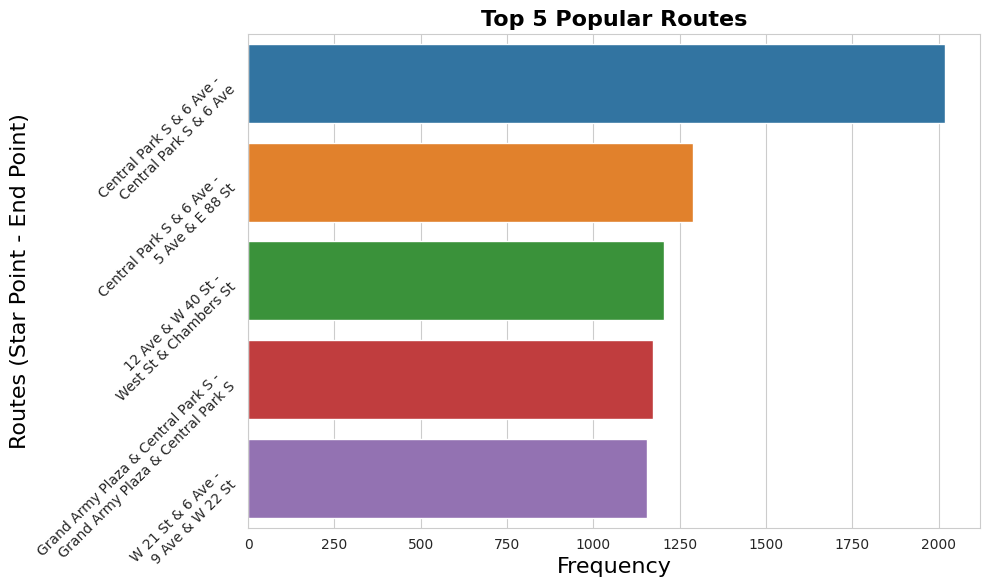

In [73]:
import seaborn as sns

# Selecionar as 5 rotas mais populares
top_5 = popular_routes.head(5)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# Criar um gráfico de barras usando Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=top_5, x='Frequency', y='Routes')
plt.xlabel('Frequency', fontdict=font)
plt.ylabel('Routes (Star Point - End Point)',  fontdict=font)
plt.title('Top 5 Popular Routes', weight='bold', fontdict=font)
plt.yticks(rotation=45)


plt.tight_layout()
plt.show()


## Verificando valores NaN values e linhas duplicadas - Nada definido

In [20]:
df.shape

(4000000, 18)

In [30]:
df.loc[df['start_station_id'].isna()]

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,weekday,Routes
1609757,7.966667,2018-10-28 23:52:12.567,2018-10-29 00:00:10.922,NaN,None,40.863,-73.899,NaN,None,40.851,-73.893,34541.0,Customer,1999.0,1.0,19.0,Sunday,NaN
1615705,23.116667,2018-08-28 11:00:13.537,2018-08-28 11:23:21.465,NaN,None,40.851,-73.899,NaN,None,40.848,-73.881,34460.0,Subscriber,1993.0,2.0,25.0,Tuesday,NaN
1618929,17.950000,2018-11-28 23:05:38.997,2018-11-28 23:23:36.423,NaN,None,40.860,-73.905,NaN,None,40.857,-73.905,34533.0,Subscriber,1988.0,1.0,30.0,Wednesday,NaN
1622094,16.666667,2018-09-22 16:23:30.294,2018-09-22 16:40:10.796,NaN,None,40.854,-73.887,NaN,None,40.866,-73.884,34899.0,Subscriber,1987.0,1.0,31.0,Saturday,NaN
1630357,26.500000,2018-08-23 15:01:38.545,2018-08-23 15:28:08.745,NaN,None,40.857,-73.881,NaN,None,40.866,-73.884,34609.0,Customer,1992.0,2.0,26.0,Thursday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078042,2.300000,2019-08-14 22:33:46.678,2019-08-14 22:36:05.119,NaN,None,40.866,-73.896,NaN,None,40.866,-73.896,34565.0,Subscriber,1975.0,1.0,44.0,Wednesday,NaN
3094792,19.466667,2019-08-27 06:32:17.479,2019-08-27 06:51:46.021,NaN,None,40.848,-73.902,NaN,None,40.863,-73.890,34428.0,Customer,1998.0,1.0,21.0,Tuesday,NaN
3181790,36.733333,2019-08-20 21:43:24.209,2019-08-20 22:20:08.811,NaN,None,40.845,-73.899,NaN,None,40.845,-73.890,34905.0,Customer,1986.0,2.0,33.0,Tuesday,NaN
3246524,16.716667,2019-07-29 20:39:03.390,2019-07-29 20:55:46.847,NaN,None,40.866,-73.893,NaN,None,40.863,-73.893,34480.0,Subscriber,1995.0,1.0,24.0,Monday,NaN


In [21]:
df.isna().sum()   # Mostra o total de valores NaN em cada coluna

tripduration_min                0
starttime                       0
stoptime                        0
start_station_id              151
start_station_name            151
start_station_latitude          0
start_station_longitude         0
end_station_id                151
end_station_name              151
end_station_latitude            0
end_station_longitude           0
bikeid                          0
usertype                     3566
birth_year                 214167
gender                          0
age                        214167
weekday                         0
Routes                        151
dtype: int64

In [22]:
# df = df.dropna( inplace=False)  # Remove linhas onde não há nenhuma informação

In [23]:
df.shape

(4000000, 18)

In [24]:
# Podemos ver quantos são homens(1), mulheres(2) e desconhecidos(0)
df['gender'].value_counts()

1.0    2704082
2.0     914750
0.0     381168
Name: gender, dtype: int64

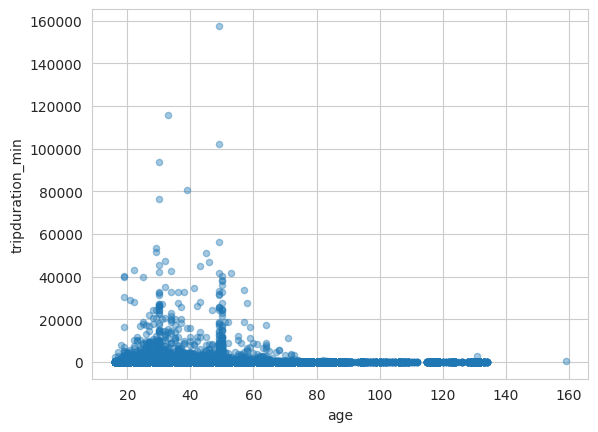

In [25]:
df.plot(kind="scatter", y="tripduration_min", x="age",
 alpha=0.4)
plt.show()

In [26]:
df.loc[df['start_station_name']=="Hs Don't Use"].head(10)

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,weekday,Routes
804164,1.633333,2017-10-02 08:04:46,2017-10-02 08:06:25,3197.0,Hs Don't Use,40.719252,-74.034234,3183.0,Exchange Place,40.716247,-74.033459,26209.0,Subscriber,1984.0,1.0,33.0,Monday,Hs Don't Use - \nExchange Place
1151036,4.683333,2017-10-01 18:57:39,2017-10-01 19:02:21,3197.0,Hs Don't Use,40.719252,-74.034234,3480.0,WS Don't Use,0.000000,0.000000,31815.0,Subscriber,1984.0,2.0,33.0,Sunday,Hs Don't Use - \nWS Don't Use
1163859,5.300000,2017-10-01 21:51:39,2017-10-01 21:56:58,3197.0,Hs Don't Use,40.719252,-74.034234,3186.0,Grove St PATH,40.719586,-74.043117,26224.0,Subscriber,1988.0,2.0,29.0,Sunday,Hs Don't Use - \nGrove St PATH
1200757,1.750000,2017-10-02 07:43:20,2017-10-02 07:45:05,3197.0,Hs Don't Use,40.719252,-74.034234,3183.0,Exchange Place,40.716247,-74.033459,31867.0,Subscriber,NaN,0.0,NaN,Monday,Hs Don't Use - \nExchange Place
1249985,4.633333,2017-10-01 17:04:14,2017-10-01 17:08:52,3197.0,Hs Don't Use,40.719252,-74.034234,3481.0,York St,40.716490,-74.041050,29579.0,Subscriber,1990.0,1.0,27.0,Sunday,Hs Don't Use - \nYork St
1456317,5.716667,2017-10-01 10:19:17,2017-10-01 10:25:00,3197.0,Hs Don't Use,40.719252,-74.034234,3214.0,Essex Light Rail,40.712774,-74.036486,31824.0,Subscriber,1985.0,2.0,32.0,Sunday,Hs Don't Use - \nEssex Light Rail
